In [177]:
from scipy.io import loadmat
import proplot as pplt
import pandas as pd
import numpy as np
import sys
sys.path.append('../../drifter')
from importlib import reload
import utilities.cleaning as clean
import utilities.interpolation as interp

clean = reload(clean)
interp = reload(interp)

In [146]:
import os
year = '2010'
avail = os.listdir('../../data/webData/' + year)

['300234010427110.csv', '300234010429060.csv', '300234010429080.csv']

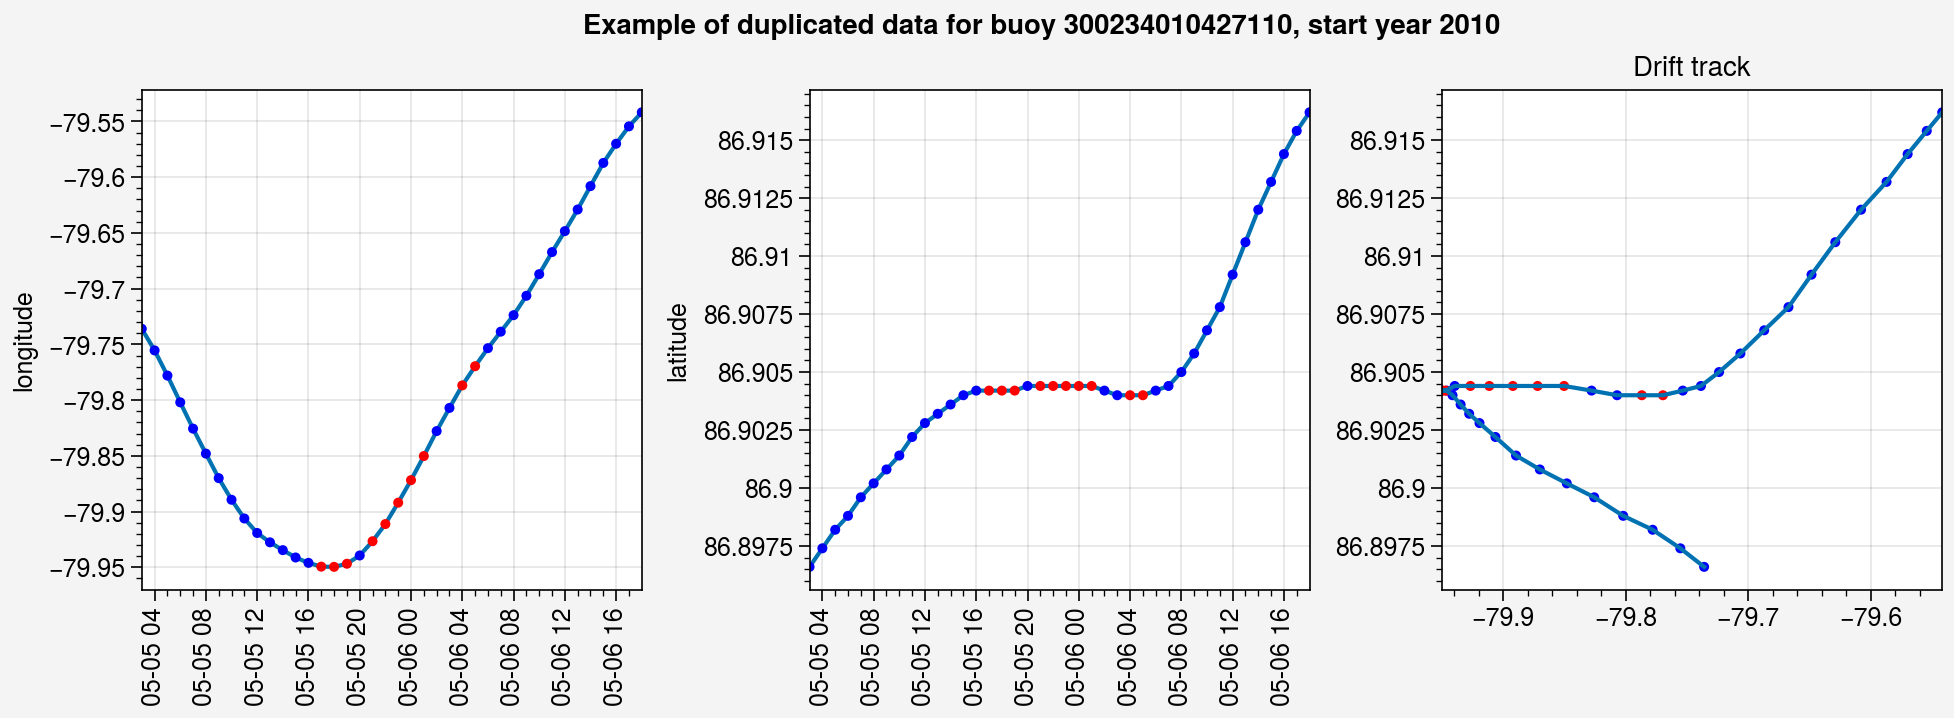

In [202]:
year = '2010'
buoy = '300234010427110'

test = pd.read_csv('../../data/webData/' + year + '/' + avail[0], index_col=0)
test.columns = [c.lower() for c in test.columns]
test.rename({'lat': 'latitude', 'lon': 'longitude'}, axis=1, inplace=True)
test['date'] = pd.Series([pd.to_datetime(str(y) + '-01-01 00:00') + pd.to_timedelta(x, unit='days') 
              for x, y in zip(test.doy, test.year)]).round('1min')

test['flag_date'] = clean.check_times(test)
test['flag_dup'] = clean.flag_duplicates(test)
test['flag_speed'] = clean.check_speed(test)

data = test.loc[~test.flag_date].iloc[60:100]
fig, ax = pplt.subplots(ncols=3, share=False)
ax[0].plot(data.date.values, data.longitude, zorder=0)
ax[0].scatter(data.date.values, data.longitude, c=data.flag_dup.values, cmap='bwr', zorder=1, marker='.')
ax[1].plot(data.date.values, data.latitude, zorder=0)
ax[1].scatter(data.date.values, data.latitude, c=data.flag_dup.values, cmap='bwr', zorder=1, marker='.')

ax[2].plot(data.longitude.values, data.latitude.values)
ax[2].scatter(data.longitude.values, data.latitude.values, c=data.flag_dup.values, cmap='bwr', marker='.', zorder=1)
ax[2].format(title='Drift track')
ax.format(suptitle='Example of duplicated data for buoy ' + avail[0].replace('.csv', '') + ', start year ' + year)
ax.format(xreverse=False, yreverse=False)

In [241]:
test['gap'] = (test.date.shift(-1) - test.date).dt.total_seconds()/(60*60)

<a list of 1 Line2D objects>

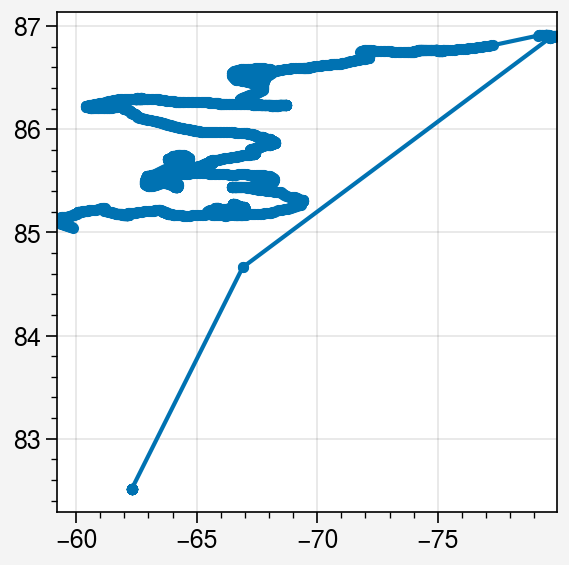

In [244]:
flag = test.flag_date | test.flag_dup
flag = flag & (test.gap > 12)
data = test.loc[~flag]
fig, ax = pplt.subplots()
ax.plot(data.longitude.values, data.latitude.values, marker='.')

In [207]:
clean_data = loadmat('../../data/JennyProcessed/IABP2010.mat')['IABP2010']

In [208]:
# Pick an index, there's going to be some issues. Test_duplicates is idx=0, test_speed is idx=20.
idx = 0
ndata = {n: clean_data[n][0] for n in clean_data.dtype.names}
buoy0 = pd.DataFrame({c: np.concatenate(ndata[c][idx]) for c in clean_data.dtype.names[1:]})
buoy0['id'] = buoy0['id'].astype(int)
buoy0['date'] = pd.Series([pd.to_datetime(str(y) + '-01-01 00:00') + pd.to_timedelta(x, unit='days') 
              for x, y in zip(buoy0.yday, buoy0.year)]).round('1min')
buoy0.rename({'lat': 'latitude',
              'lon': 'longitude'}, axis=1, inplace=True)
buoy0.to_csv('../data/test_speed.csv')

In [218]:
test.loc[test.flag_dup].head(10).loc[:, ['year', 'hour', 'min', 'flag_dup']]

,year,hour,min,flag_dup
1,2010,14,2,True
4,2011,14,0,True
5,2011,15,0,True
6,2011,16,0,True
7,2011,17,0,True
8,2011,18,0,True
9,2011,19,0,True
10,2011,20,0,True
11,2011,21,0,True
12,2011,22,0,True


In [219]:
buoy0.loc[buoy0.flag==1].head(10)

,id,year,yday,datenum,latitude,longitude,flag,date
1,300234010427110,2010,138.585,734276.585,82.5118,-62.3276,1,2010-05-19 14:02:00
4,300234010427110,2011,121.583,734624.583,82.5118,-62.3276,1,2011-05-02 14:00:00
5,300234010427110,2011,121.625,734624.625,82.5118,-62.3276,1,2011-05-02 15:00:00
7,300234010427110,2011,121.708,734624.708,82.5118,-62.3274,1,2011-05-02 17:00:00
8,300234010427110,2011,121.750,734624.750,82.5118,-62.3274,1,2011-05-02 18:00:00
9,300234010427110,2011,121.792,734624.792,82.5118,-62.3274,1,2011-05-02 19:00:00
10,300234010427110,2011,121.833,734624.833,82.5118,-62.3274,1,2011-05-02 20:00:00
16,300234010427110,2011,122.083,734625.083,82.5118,-62.3276,1,2011-05-03 02:00:00
21,300234010427110,2011,122.292,734625.292,82.5118,-62.3276,1,2011-05-03 07:00:00
22,300234010427110,2011,122.333,734625.333,82.5118,-62.3276,1,2011-05-03 08:00:00


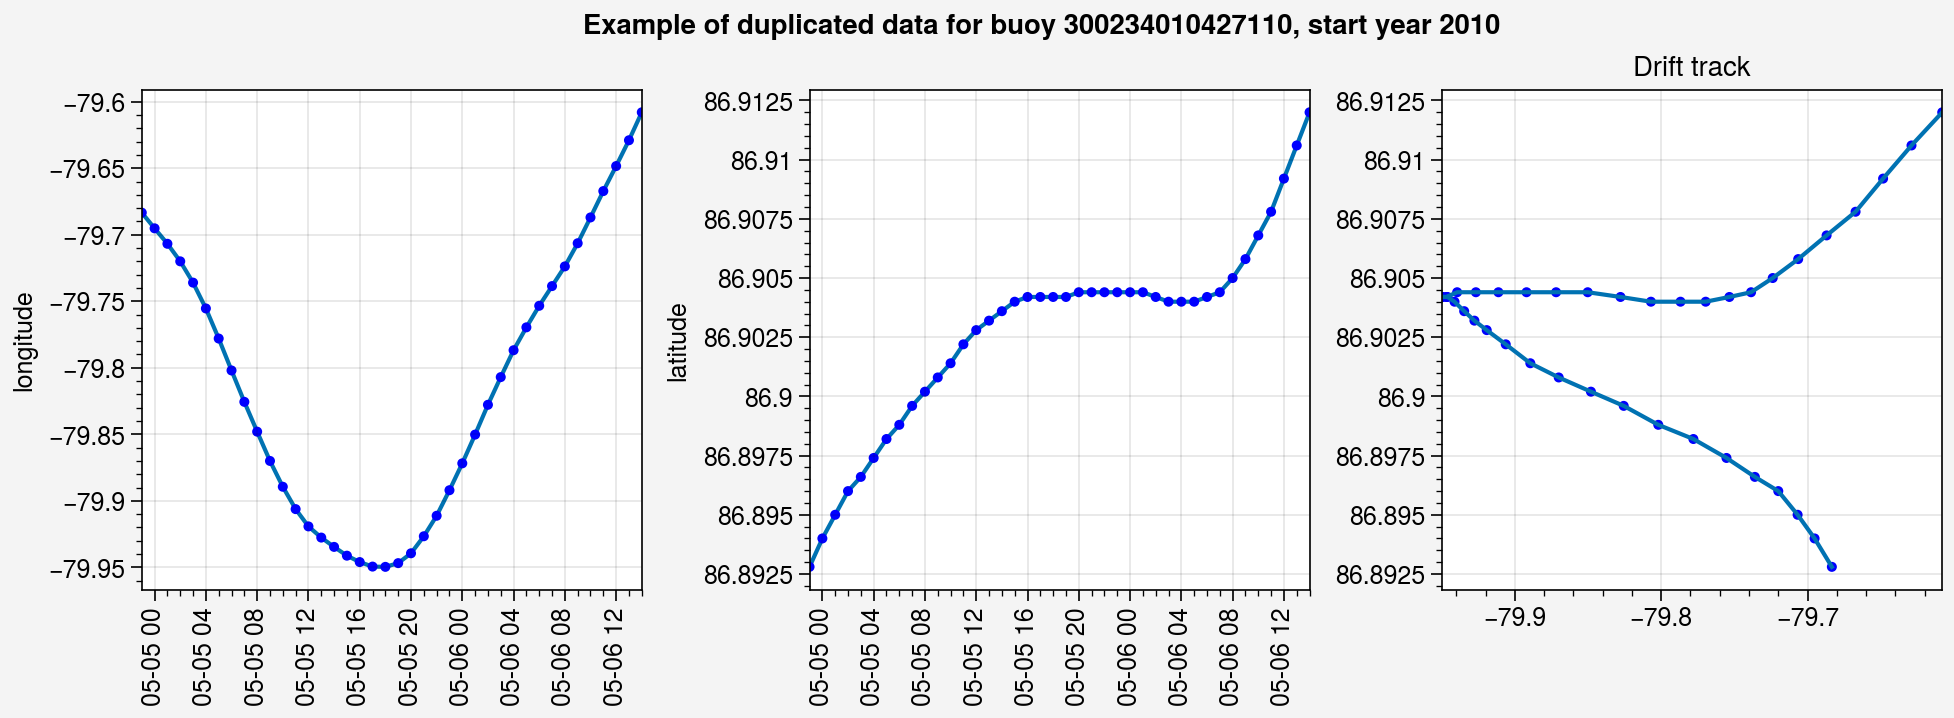

In [222]:
data = buoy0.iloc[60:100]
fig, ax = pplt.subplots(ncols=3, share=False)
ax[0].plot(data.date.values, data.longitude, zorder=0)
ax[0].scatter(data.date.values, data.longitude, c=data.flag.values, cmap='bwr', zorder=1, marker='.')
ax[1].plot(data.date.values, data.latitude, zorder=0)
ax[1].scatter(data.date.values, data.latitude, c=data.flag.values, cmap='bwr', zorder=1, marker='.')

ax[2].plot(data.longitude.values, data.latitude.values)
ax[2].scatter(data.longitude.values, data.latitude.values, c=data.flag.values, cmap='bwr', marker='.', zorder=1)
ax[2].format(title='Drift track')
ax.format(suptitle='Example of duplicated data for buoy ' + avail[0].replace('.csv', '') + ', start year ' + year)
ax.format(xreverse=False, yreverse=False)

In [136]:
testdf = pd.read_csv('../data/test_speed.csv', index_col=0)
testdf['date'] = pd.to_datetime(testdf.date.values)
time_check = utilities.cleaning.check_times(testdf)
dup_check = utilities.cleaning.flag_duplicates(testdf)
spd_check = utilities.cleaning.check_speed(testdf)


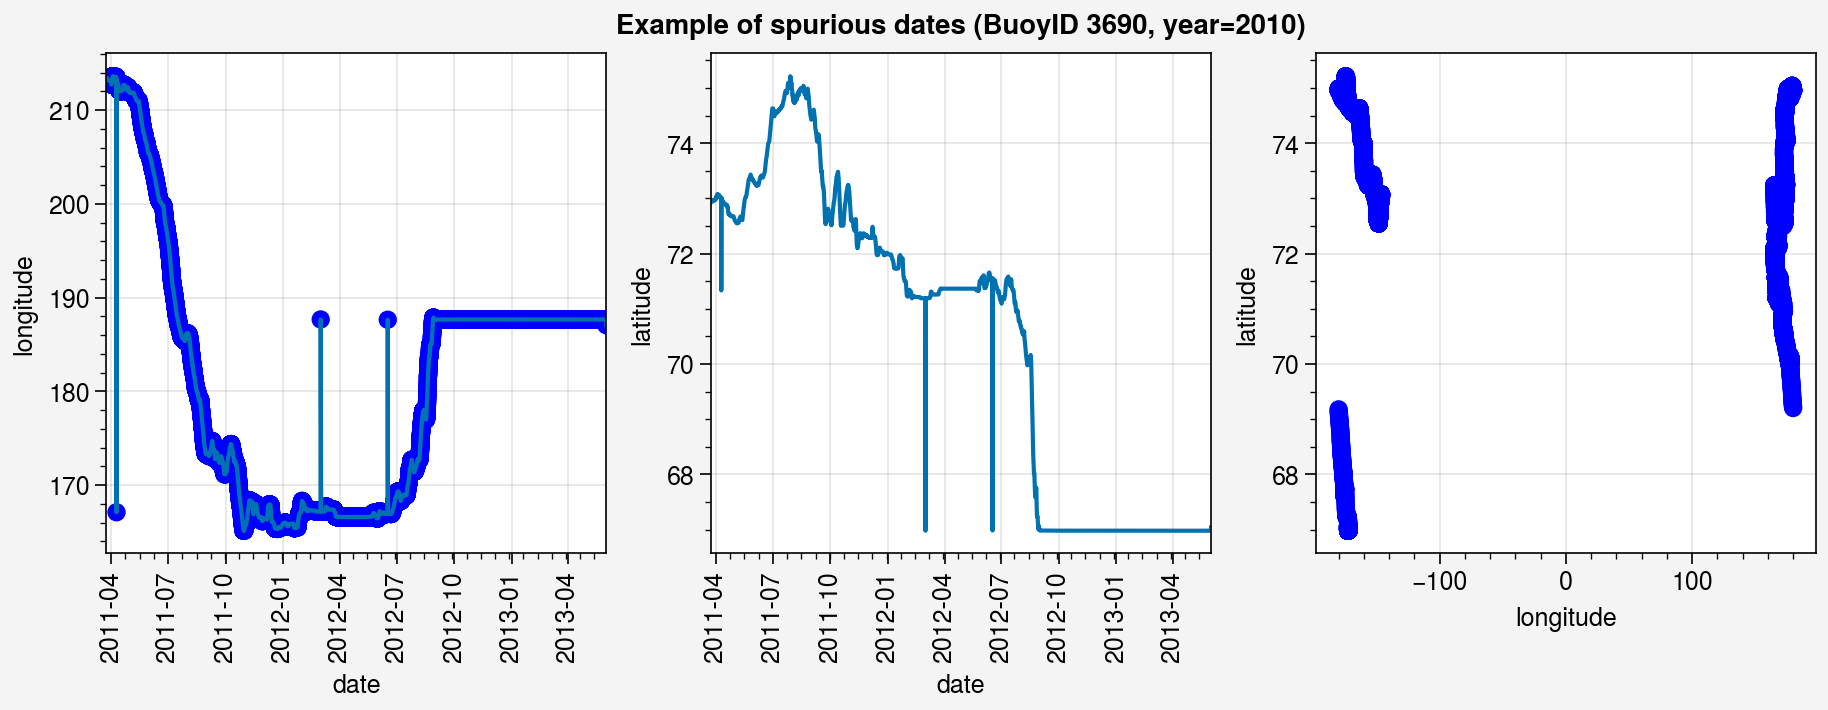

In [144]:
fig, ax = pplt.subplots(ncols=3, share=False)
ax[0].plot(testdf.date, (testdf.longitude + 360) % 360)
ax[1].plot(testdf.date, testdf.latitude)
ax[0].scatter(testdf.date.values, (testdf.longitude + 360) % 360, c=time_check.values, cmap='bwr')
ax.format(suptitle='Example of spurious dates (BuoyID 3690, year=2010)')
ax[2].scatter(testdf.longitude, testdf.latitude, c=time_check.values, cmap='bwr')
fig.save('../example_of_bad_dates.jpg', dpi=72)

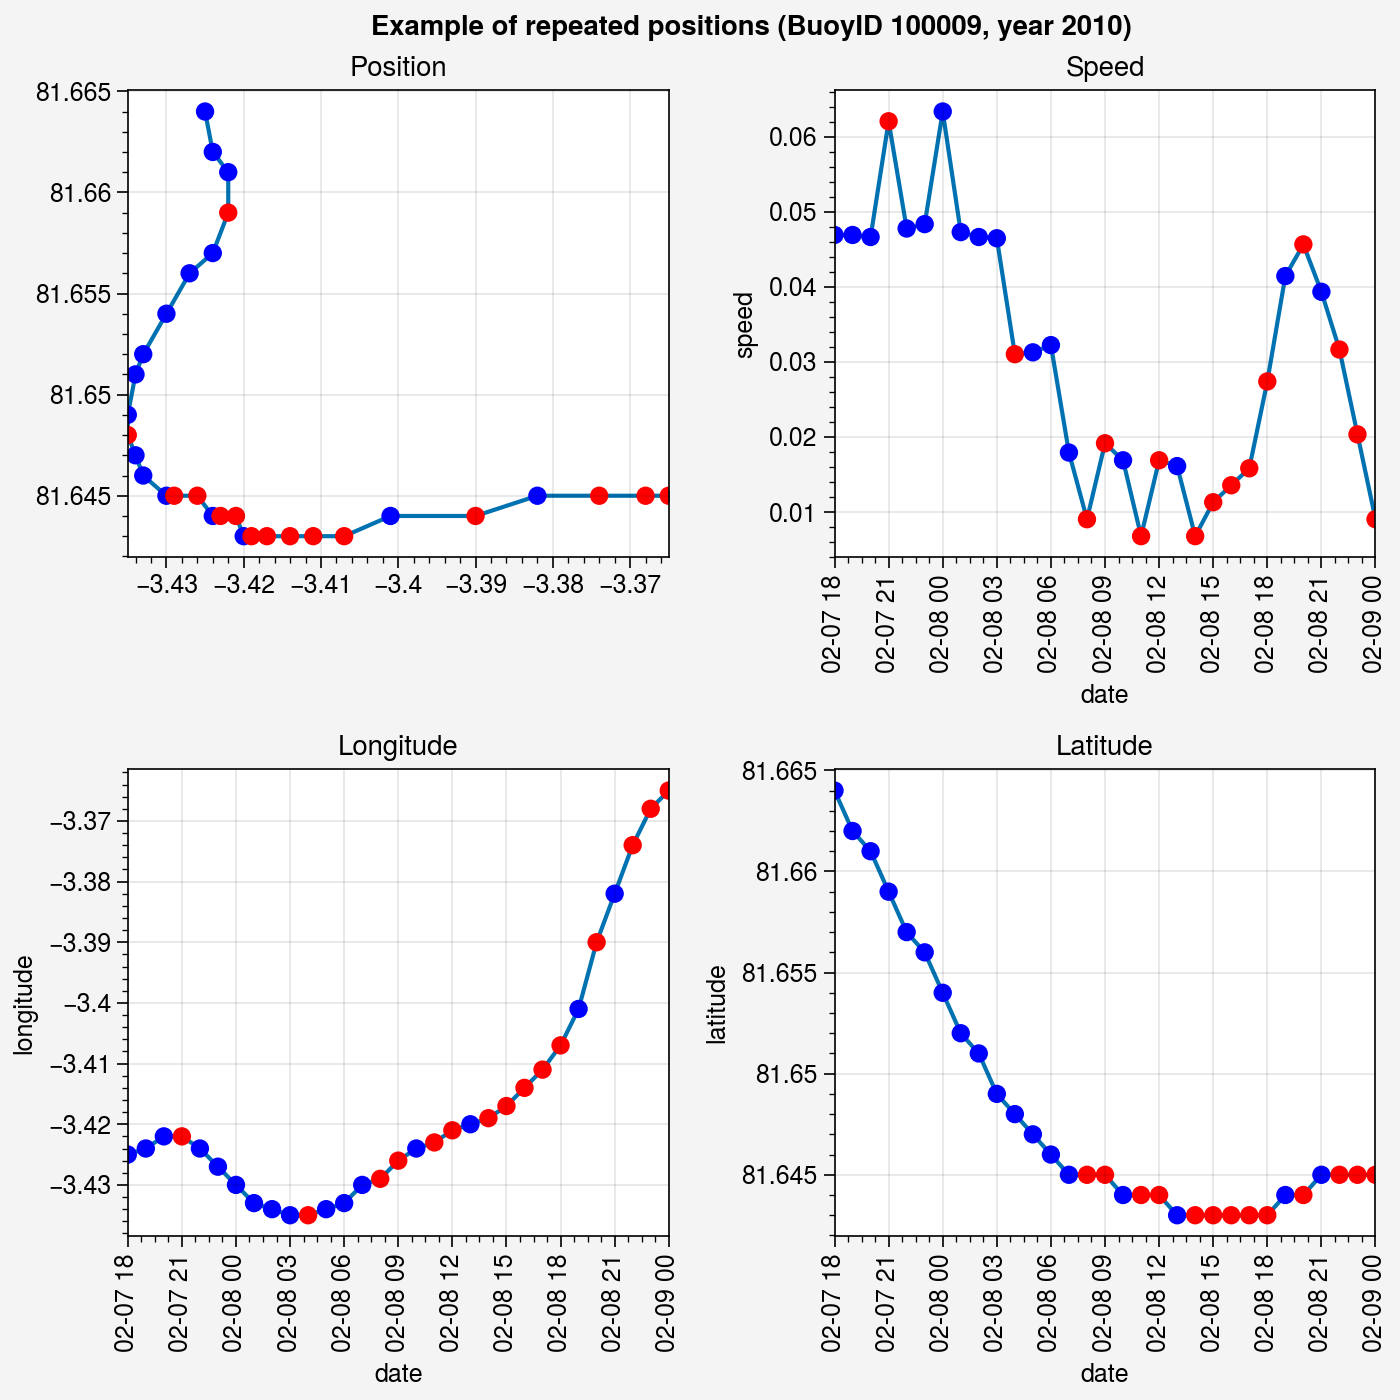

In [88]:
### Make figure showing issue with duplicated latitudes
### Could make separate function to compute velocity and acceleration
import pyproj as proj

testdf = pd.read_csv('../data/test_duplicates.csv', index_col=0)
testdf['date'] = pd.to_datetime(testdf.date.values)
time_check = utilities.cleaning.check_times(testdf)
dup_check = utilities.cleaning.flag_duplicates(testdf)
spd_check = utilities.cleaning.check_speed(testdf)

testdf['test_flag'] = dup_check

projIn = 'epsg:4326' # WGS 84 Ellipsoid
projOut = 'epsg:3571' # Lambert Azimuthal Equal Area centered at north pole, lon0 is 180
transformer = proj.Transformer.from_crs(projIn, projOut, always_xy=True)

lon = testdf.longitude.values
lat = testdf.latitude.values

x, y = transformer.transform(lon, lat)
testdf['x'] = x
testdf['y'] = y

dt = (testdf.date.shift(-1) - testdf.date.shift(1)).dt.total_seconds()

def centered_velocity(xvar, yvar, data, dt=3600):
    """Assumes the rows are a datetime index with 30 min step size."""
    dx = data[xvar].shift(-1) - data[xvar].shift(1)
    dy = data[yvar].shift(-1) - data[yvar].shift(1)
    return dx/dt, dy/dt

dxdt, dydt = centered_velocity('x', 'y', testdf, dt)
testdf['u'] = dxdt
testdf['v'] = dydt
testdf['speed'] = np.sqrt(testdf['v']**2 + testdf['u']**2)

ddxddt, ddyddt = centered_velocity('u', 'v', testdf, dt)
testdf['du'] = ddxddt
testdf['dv'] = ddyddt
testdf['accel'] = np.sqrt(ddxddt**2 + ddyddt**2)

data = testdf.loc[45:75]
fig, axs = pplt.subplots(width=7, height=7, ncols=2, nrows=2, share=False)

ax = axs[0, 0]
ax.plot(data['longitude'].values, data['latitude'].values, marker='.', zorder=0)
ax.scatter(data['longitude'].values, data['latitude'].values, marker='o', c=data['test_flag'], cmap='bwr', zorder=1)
ax.format(title='Position')

ax = axs[1,0]
ax.plot(data['date'].values, data['longitude'].values, zorder=0)
ax.scatter(data['date'], data['longitude'], marker='o', c=data['test_flag'], cmap='bwr', zorder=1)
ax.format(title='Longitude')

ax = axs[1,1]
ax.plot(data['date'].values, data['latitude'].values, zorder=0)
ax.scatter(data['date'], data['latitude'], marker='o', c=data.latitude.shift(1) == data.latitude, cmap='bwr', zorder=1)

ax.format(title='Latitude')

ax = axs[0,1]
ax.plot(data['date'].values, data['speed'].values, zorder=0)
ax.scatter(data['date'], data['speed'], marker='o', c=data['test_flag'], cmap='bwr', zorder=1)
ax.format(title='Speed')
ax.format(suptitle='Example of repeated positions (BuoyID 100009, year 2010)')
fig.save('../example_repeated_positions.jpg', dpi=72)

In [114]:
testdf = pd.read_csv('../data/test_speed.csv', index_col=0)
testdf['date'] = pd.to_datetime(testdf.date.values)
time_check = utilities.cleaning.check_times(testdf)
dup_check = utilities.cleaning.flag_duplicates(testdf)
spd_check = utilities.cleaning.check_speed(testdf)

